In [2]:
import pandas as pd

# Load the Excel file
file_path = "shihara_dataset.xlsx"  # Ensure the correct file extension
df = pd.read_excel(file_path)

# Display the first few rows
df.head()


,Date,Particulars,Payments,Receipts,Balance
0,2022-12-27,IB CEFT CHGS K A Kumaranayek,30,NaN,8449.35
1,2022-12-27,PURCHASE UNIVERSITY GRANTS C,50,NaN,8399.35
2,2022-12-28,PURCHASE KEELLS SUPER - MORA,5000,NaN,3399.35
3,2022-12-30,INTEREST,NaN,41.57,3440.92
4,2023-01-04,NOV RENT,3000,75000.00,78440.92


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
# Extract the 'particulars' column
particulars = df['Particulars'].fillna('')

In [6]:
particulars.head()

0    IB CEFT CHGS K A Kumaranayek
1    PURCHASE UNIVERSITY GRANTS C
2    PURCHASE KEELLS SUPER - MORA
3                        INTEREST
4                        NOV RENT
Name: Particulars, dtype: object

In [7]:
# Vectorize the 'particulars' column using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(particulars)

In [18]:
# Apply K-Means Clustering
n_clusters = 70 # You can adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

In [19]:
print(df[['Particulars', 'cluster']].head())

                    Particulars  cluster
0  IB CEFT CHGS K A Kumaranayek       26
1  PURCHASE UNIVERSITY GRANTS C       14
2  PURCHASE KEELLS SUPER - MORA       38
3                      INTEREST       14
4                      NOV RENT       14


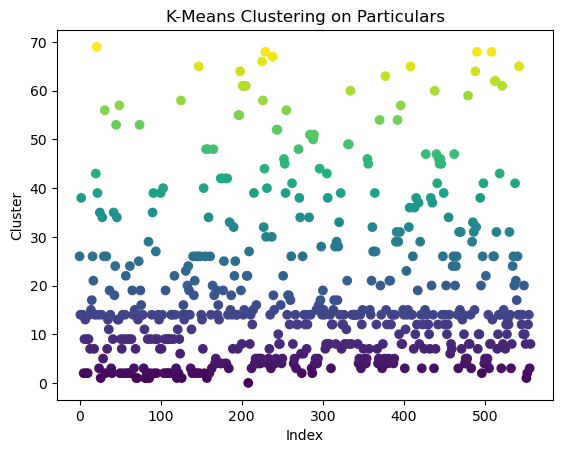

In [20]:
# Plot the clustering result
plt.scatter(df.index, df['cluster'], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering on Particulars')
plt.xlabel('Index')
plt.ylabel('Cluster')
plt.show()

In [23]:
df = pd.read_excel(file_path)
df.head()

,Date,Particulars,Payments,Receipts,Balance
0,2022-12-27,IB CEFT CHGS K A Kumaranayek,30,NaN,8449.35
1,2022-12-27,PURCHASE UNIVERSITY GRANTS C,50,NaN,8399.35
2,2022-12-28,PURCHASE KEELLS SUPER - MORA,5000,NaN,3399.35
3,2022-12-30,INTEREST,NaN,41.57,3440.92
4,2023-01-04,NOV RENT,3000,75000.00,78440.92


In [28]:
# Extract columns
Particulars = df['Particulars'].fillna('')
Payments = df['Payments'].fillna(0)
Receipts = df['Receipts'].fillna(0)
Balance = df['Balance'].fillna(0)

In [29]:
# Vectorize the 'particulars' column using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
particulars_vectorized = vectorizer.fit_transform(particulars)

In [30]:
numeric_data = df[['Payments', 'Receipts', 'Balance']].values

In [32]:
from sklearn.preprocessing import StandardScaler